**Imported packages**

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt 


In [101]:
df=pd.read_csv("/content/results.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    8289 non-null   object
 1   DateTime  8289 non-null   object
 2   HomeTeam  8289 non-null   object
 3   AwayTeam  8289 non-null   object
 4   FTHG      8289 non-null   int64 
 5   FTAG      8289 non-null   int64 
 6   FTR       8289 non-null   object
 7   HTHG      8289 non-null   int64 
 8   HTAG      8289 non-null   int64 
 9   HTR       8289 non-null   object
 10  Referee   8289 non-null   object
 11  HS        8289 non-null   int64 
 12  AS        8289 non-null   int64 
 13  HST       8289 non-null   int64 
 14  AST       8289 non-null   int64 
 15  HC        8289 non-null   int64 
 16  AC        8289 non-null   int64 
 17  HF        8289 non-null   int64 
 18  AF        8289 non-null   int64 
 19  HY        8289 non-null   int64 
 20  AY        8289 non-null   int64 
 21  HR        8289

In [102]:
df

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0,1,A,...,8,5,9,3,12,14,2,3,0,0
8285,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0,0,D,...,7,1,4,6,2,6,0,1,0,0
8286,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2,0,H,...,3,3,3,4,11,12,1,1,0,0
8287,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1,0,H,...,6,4,6,7,12,10,1,1,0,0


# Data Analytics

In [103]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000,8289.000000
mean,1.519242,1.155507,0.681506,0.506816,13.503921,10.644589,6.117264,4.768247,6.081795,4.784292,11.379057,11.873447,1.415852,1.746532,0.062854,0.089396
std,1.299000,1.142826,0.831712,0.723624,5.258636,4.583010,3.327521,2.792965,3.095070,2.728954,3.784956,3.957427,1.189134,1.267468,0.253416,0.297341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


**Correlation**

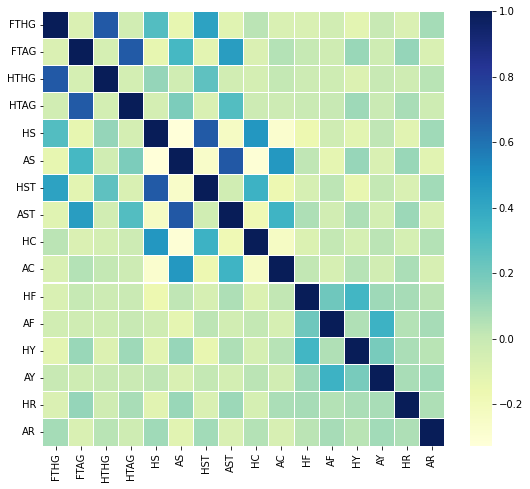

In [104]:
corrmatrix = df.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmatrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

**frequency of match reults**

Text(0, 0.5, 'Frequency')

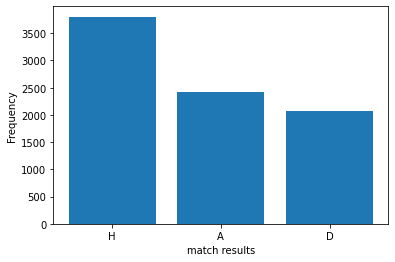

In [105]:
fig, chart = plt.subplots()
data = df['FTR'].value_counts()
points = data.index
frequency = data.values
chart.bar(points, frequency)
chart.set_xlabel('match results')
chart.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

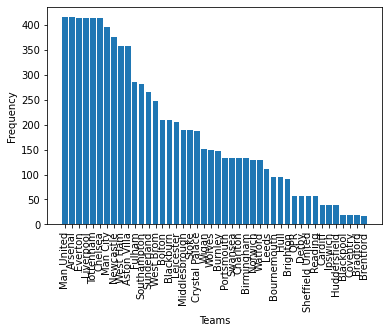

In [106]:
fig, chart = plt.subplots()
data = df['HomeTeam'].value_counts()
points = data.index
frequency = data.values
chart.bar(points, frequency)
plt.xticks(rotation=90)
chart.set_xlabel('Teams')
chart.set_ylabel('Frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8542d46a00>,
      dtype=object)

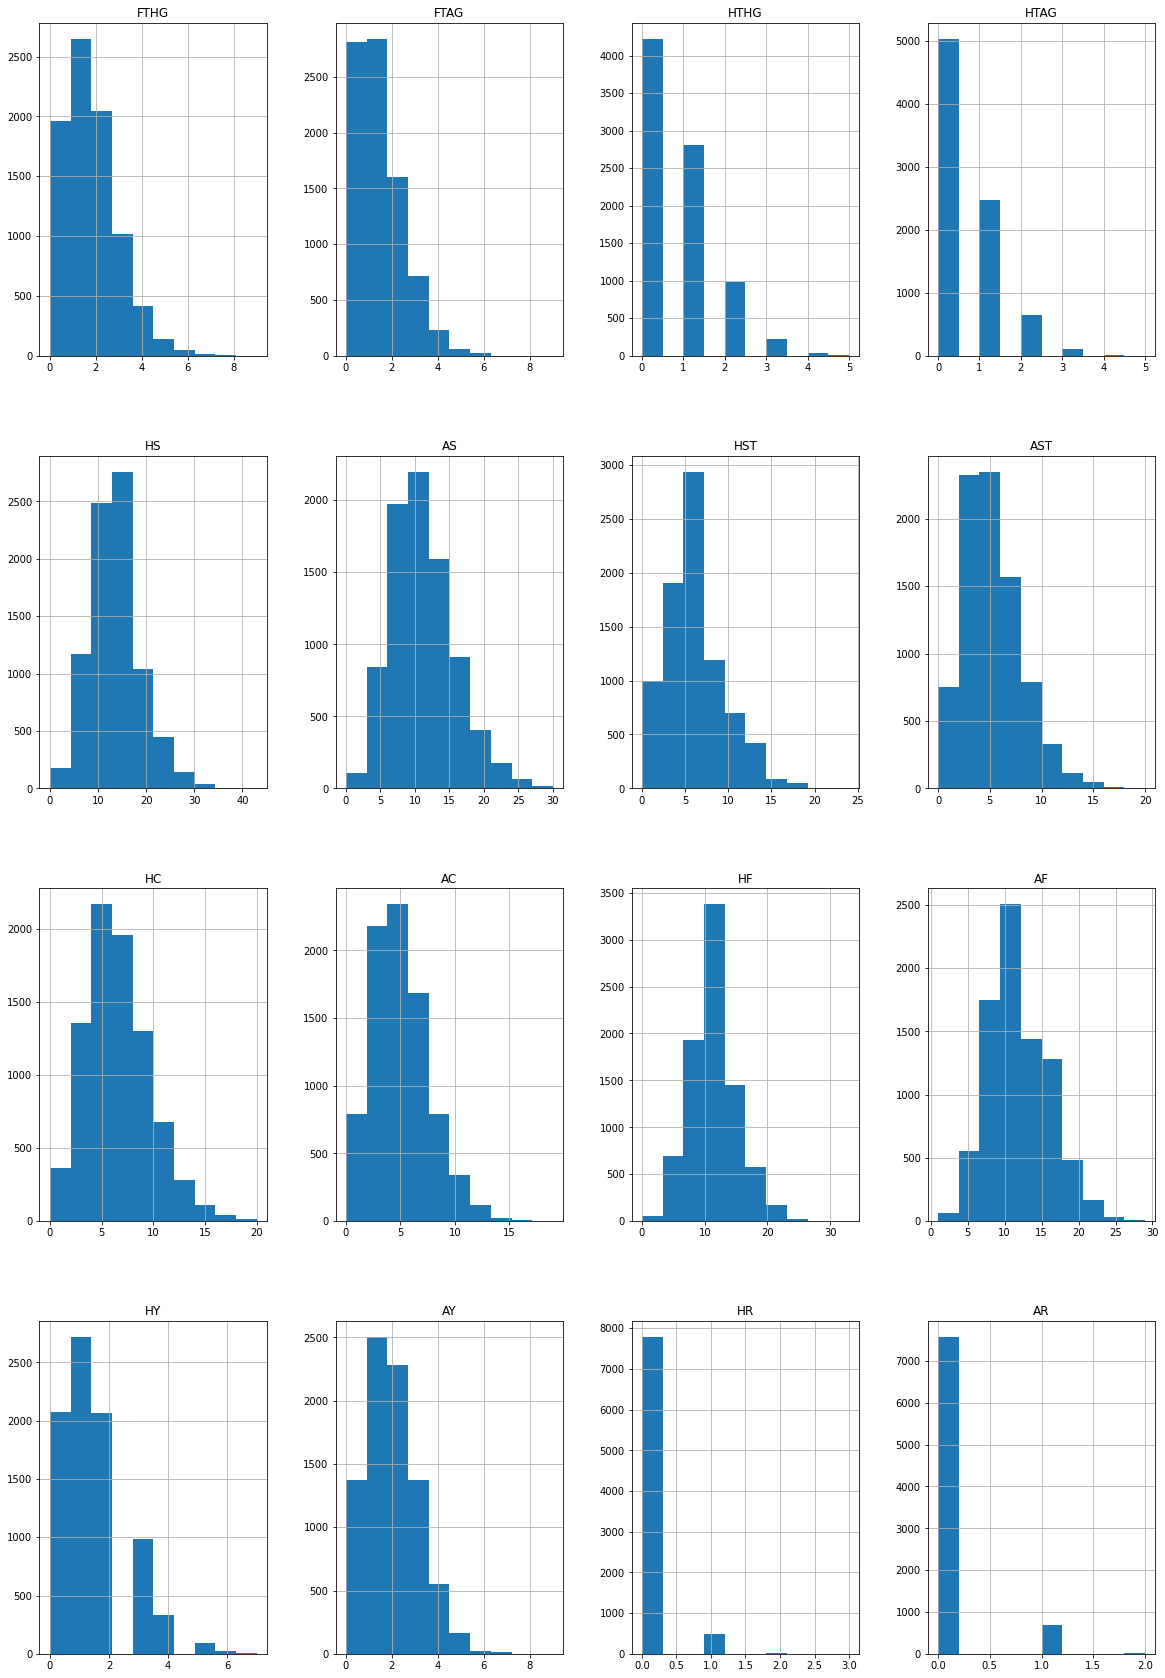

In [107]:
df.hist(figsize=(20,30))

**relation between home shots and match results**

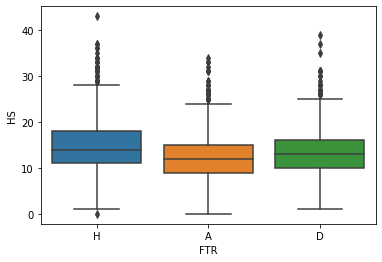

In [109]:
sns.boxplot(x="FTR",y="HS",data=df)

**relation between commited fouls by home team and results**

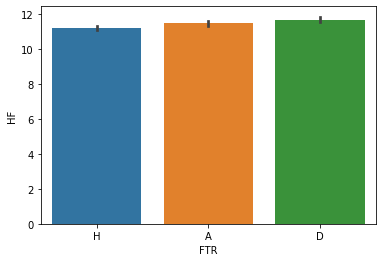

In [113]:
sns.barplot(x="FTR",y="HF",data=df)

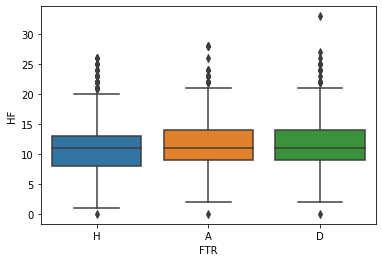

In [115]:
sns.boxplot(x="FTR",y="HF",data=df)

**Pair plot**

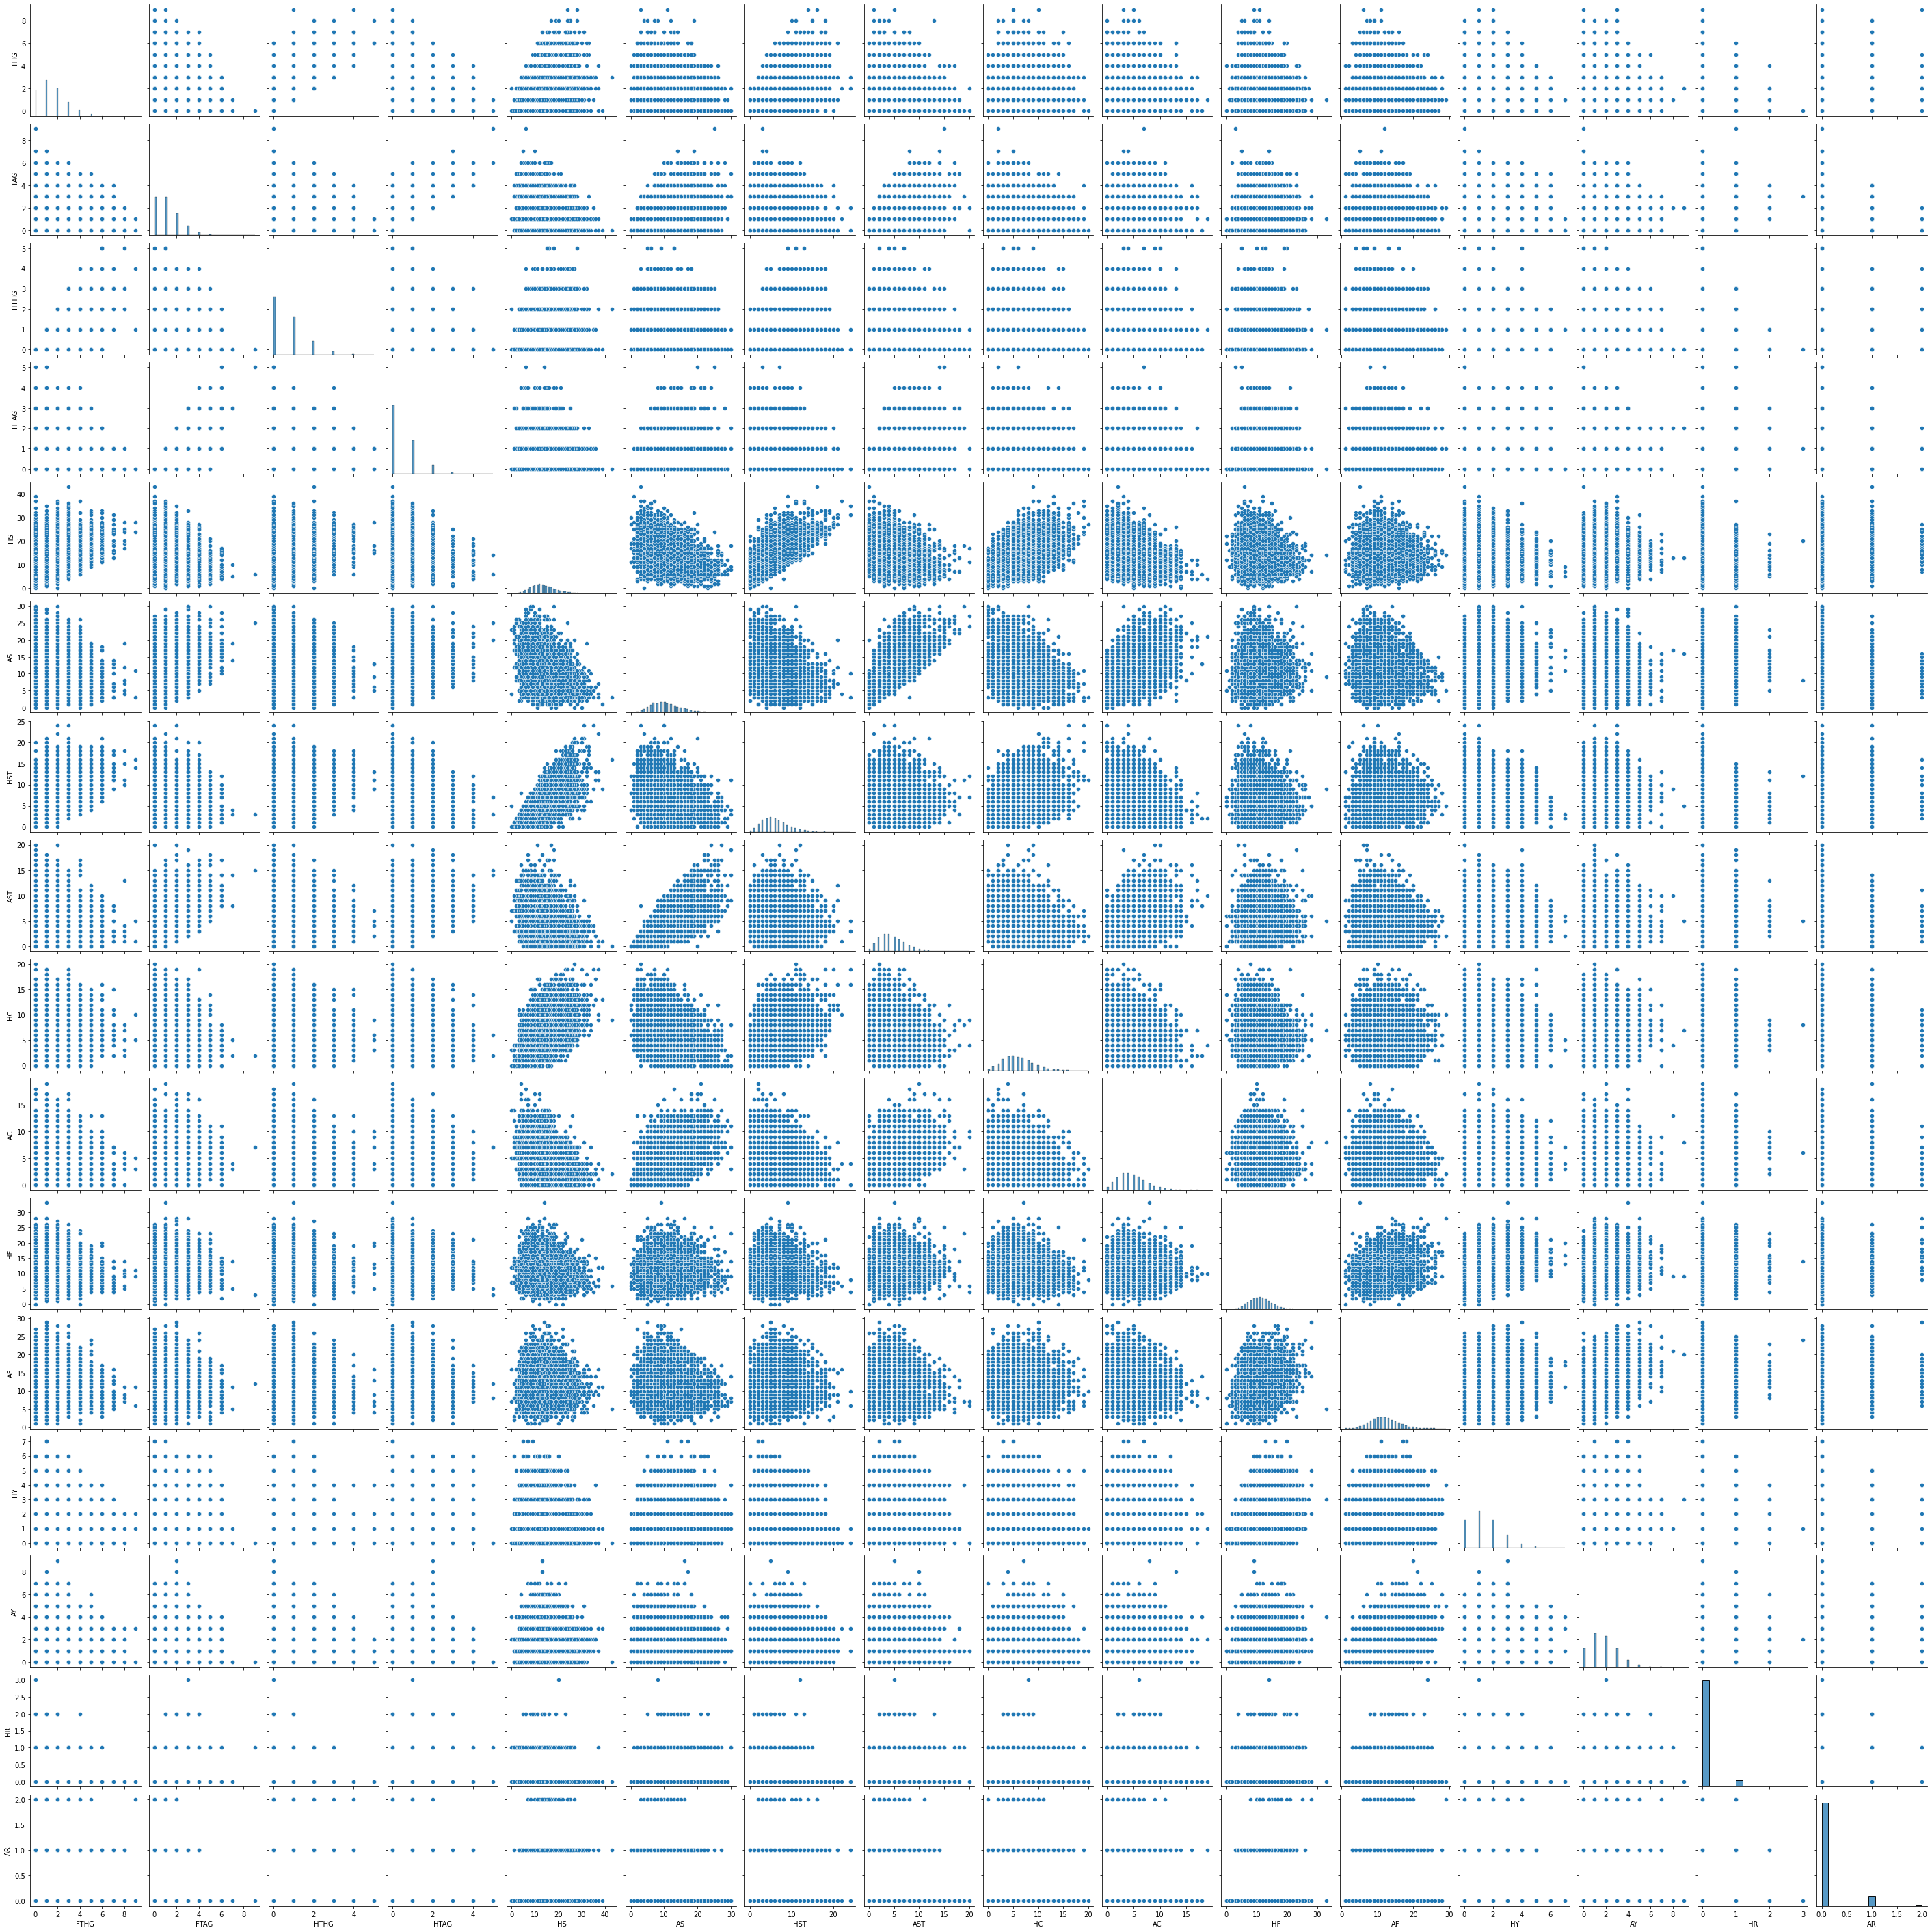

In [114]:
sns.pairplot(df)

# Data Preprocessing

 **drop unwanted column**

In [69]:
df.drop(['Referee',"DateTime"], axis = 1, inplace = True) 

 **sort data**

In [70]:
df2=df.sort_values(by=['HomeTeam',"AwayTeam"])

In [71]:
df2 = df2.reset_index(drop=True)

In [72]:
df2

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,Arsenal,Aston Villa,1,0,H,0,0,D,16,...,10,3,7,4,12,20,1,4,0,1
1,2001-02,Arsenal,Aston Villa,3,2,H,0,2,A,15,...,8,5,9,3,18,14,4,0,0,0
2,2002-03,Arsenal,Aston Villa,3,1,H,1,0,H,13,...,7,5,6,9,11,20,2,3,0,0
3,2003-04,Arsenal,Aston Villa,2,0,H,0,0,D,14,...,6,3,2,6,16,16,3,4,0,0
4,2004-05,Arsenal,Aston Villa,3,1,H,2,1,H,18,...,15,2,6,3,11,22,2,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,2020-21,Wolves,West Ham,2,3,A,1,3,A,20,...,5,6,4,2,9,9,1,4,0,0
8285,2021-22,Wolves,West Ham,1,0,H,0,0,D,15,...,5,3,7,3,6,9,1,1,0,0
8286,2009-10,Wolves,Wigan,0,2,A,0,0,D,9,...,4,14,4,3,14,16,4,3,1,1
8287,2010-11,Wolves,Wigan,1,2,A,0,2,A,8,...,4,8,7,3,7,14,1,3,0,0


In [73]:
df2.head()

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,Arsenal,Aston Villa,1,0,H,0,0,D,16,...,10,3,7,4,12,20,1,4,0,1
1,2001-02,Arsenal,Aston Villa,3,2,H,0,2,A,15,...,8,5,9,3,18,14,4,0,0,0
2,2002-03,Arsenal,Aston Villa,3,1,H,1,0,H,13,...,7,5,6,9,11,20,2,3,0,0
3,2003-04,Arsenal,Aston Villa,2,0,H,0,0,D,14,...,6,3,2,6,16,16,3,4,0,0
4,2004-05,Arsenal,Aston Villa,3,1,H,2,1,H,18,...,15,2,6,3,11,22,2,4,0,0


**Shift winner**

In [74]:
for i in range(1, len(df2)-1):
  if (df2.loc[i+1,"HomeTeam"] == df2.loc[i,"HomeTeam"]) and (df2.loc[i+1,"AwayTeam"]==df2.loc[i,"AwayTeam"]):
    df2.loc[i,"N_FTR"] = df2.loc[i+1,"FTR"]
    


In [75]:
df2

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,N_FTR
0,2000-01,Arsenal,Aston Villa,1,0,H,0,0,D,16,...,3,7,4,12,20,1,4,0,1,NaN
1,2001-02,Arsenal,Aston Villa,3,2,H,0,2,A,15,...,5,9,3,18,14,4,0,0,0,H
2,2002-03,Arsenal,Aston Villa,3,1,H,1,0,H,13,...,5,6,9,11,20,2,3,0,0,H
3,2003-04,Arsenal,Aston Villa,2,0,H,0,0,D,14,...,3,2,6,16,16,3,4,0,0,H
4,2004-05,Arsenal,Aston Villa,3,1,H,2,1,H,18,...,2,6,3,11,22,2,4,0,0,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,2020-21,Wolves,West Ham,2,3,A,1,3,A,20,...,6,4,2,9,9,1,4,0,0,H
8285,2021-22,Wolves,West Ham,1,0,H,0,0,D,15,...,3,7,3,6,9,1,1,0,0,NaN
8286,2009-10,Wolves,Wigan,0,2,A,0,0,D,9,...,14,4,3,14,16,4,3,1,1,A
8287,2010-11,Wolves,Wigan,1,2,A,0,2,A,8,...,8,7,3,7,14,1,3,0,0,H


In [76]:
df2=df2.dropna()

In [77]:
df2

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,N_FTR
1,2001-02,Arsenal,Aston Villa,3,2,H,0,2,A,15,...,5,9,3,18,14,4,0,0,0,H
2,2002-03,Arsenal,Aston Villa,3,1,H,1,0,H,13,...,5,6,9,11,20,2,3,0,0,H
3,2003-04,Arsenal,Aston Villa,2,0,H,0,0,D,14,...,3,2,6,16,16,3,4,0,0,H
4,2004-05,Arsenal,Aston Villa,3,1,H,2,1,H,18,...,2,6,3,11,22,2,4,0,0,H
5,2005-06,Arsenal,Aston Villa,5,0,H,2,0,H,20,...,4,8,8,9,11,0,1,0,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,2018-19,Wolves,West Ham,3,0,H,0,0,D,20,...,0,5,1,8,10,4,1,0,0,H
8283,2019-20,Wolves,West Ham,2,0,H,1,0,H,13,...,3,5,4,8,9,1,2,0,0,A
8284,2020-21,Wolves,West Ham,2,3,A,1,3,A,20,...,6,4,2,9,9,1,4,0,0,H
8286,2009-10,Wolves,Wigan,0,2,A,0,0,D,9,...,14,4,3,14,16,4,3,1,1,A


**label incoding for output**
2 -> home team is the winner
0 -> away team is the winner
1 -> Draw

In [78]:
label_encoder = LabelEncoder()
df2['N_FTR']= label_encoder.fit_transform(df2['N_FTR'])


<ipython-input-78-550c7de25ee6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['N_FTR']= label_encoder.fit_transform(df2['N_FTR'])


In [79]:
df2

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,N_FTR
1,2001-02,Arsenal,Aston Villa,3,2,H,0,2,A,15,...,5,9,3,18,14,4,0,0,0,2
2,2002-03,Arsenal,Aston Villa,3,1,H,1,0,H,13,...,5,6,9,11,20,2,3,0,0,2
3,2003-04,Arsenal,Aston Villa,2,0,H,0,0,D,14,...,3,2,6,16,16,3,4,0,0,2
4,2004-05,Arsenal,Aston Villa,3,1,H,2,1,H,18,...,2,6,3,11,22,2,4,0,0,2
5,2005-06,Arsenal,Aston Villa,5,0,H,2,0,H,20,...,4,8,8,9,11,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,2018-19,Wolves,West Ham,3,0,H,0,0,D,20,...,0,5,1,8,10,4,1,0,0,2
8283,2019-20,Wolves,West Ham,2,0,H,1,0,H,13,...,3,5,4,8,9,1,2,0,0,0
8284,2020-21,Wolves,West Ham,2,3,A,1,3,A,20,...,6,4,2,9,9,1,4,0,0,2
8286,2009-10,Wolves,Wigan,0,2,A,0,0,D,9,...,14,4,3,14,16,4,3,1,1,0


**Encode**

**One hot incoding for some inputs**


In [80]:
df2 = pd.get_dummies(df2, columns = ['HomeTeam',"AwayTeam","FTR","HTR"])

In [81]:
df2.head()

,Season,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,...,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
1,2001-02,3,2,0,2,15,8,8,5,9,...,0,0,0,0,0,0,1,1,0,0
2,2002-03,3,1,1,0,13,12,7,5,6,...,0,0,0,0,0,0,1,0,0,1
3,2003-04,2,0,0,0,14,6,6,3,2,...,0,0,0,0,0,0,1,0,1,0
4,2004-05,3,1,2,1,18,5,15,2,6,...,0,0,0,0,0,0,1,0,0,1
5,2005-06,5,0,2,0,20,9,16,4,8,...,0,0,0,0,0,0,1,0,0,1


In [89]:
df2.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,...,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
count,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,...,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000
mean,1.523803,1.141787,0.688804,0.501175,13.446665,10.533353,6.194534,4.786071,6.106083,4.780047,...,0.030708,0.046283,0.017632,0.016309,0.285777,0.251396,0.462827,0.233617,0.412430,0.353952
std,1.288829,1.134728,0.830966,0.715268,5.216209,4.521610,3.332966,2.779756,3.111766,2.727220,...,0.172539,0.210112,0.131618,0.126671,0.451817,0.433847,0.498653,0.423163,0.492308,0.478230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**shuffle data**

In [19]:
df2 = df2.sample(frac = 1)


**Save data frame in csv**

In [20]:
df2.to_csv("new_results.csv")